In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

PP1 Assay Model:

This is how our assay detection will work (Wet lab stuff). So there's this protein called pNpp which i guess for our case is pretty useless on it's own but when PP1(another protein) is introduced alongside pNpp, they react and pnpp is catalyzed into a bright "yellow" molecule. Microcystin inhibits the pp1 protein, hence less yellow.

So 
1) No microcystin = Baseline yellow amt (By)
2) More microcystin = less yellow (y.Mm) 
- [y.Mm < By]                       
- {y.mm = yellow when more mlra}
3) Less microcystin = more yellow/still less than baseline (y.Lm) 
- [y.Mm < y.Lm < By]                 
- {y.Lm = yellow when less mlra}

Hence, microcystin vs. yellow color has an inversely proportional relationship with the maximum (y=0) being the amt of yellow produced by pp1 and pnpp ALONE. 

Wet Lab procedure:
- Introduce microcystin to PP1 initially (PP1 degraded)
    - (So find concentration of initial PP1, find consts for microcystin-PP1 degraded)
- Introduce the (PP1 degraded) to PNPP, record amount of yellow
    - (Find consts for amount of yellow created from rxn,)
- Compare amount of yellow from standard vs amount of yellow from microcystin (Discern amount of linearized microcystin)


Input: initial PP1 assay (both C and E)
Input: initial PNPP amount 
Input: (Amount of plasmid, amount of microcystin)

Output: Amount of yellow color produced (By E)
Output: Amount of microcystin linearized (Standard yellow vs experimental yellow)

In [2]:
#PP1_conc = Init_PP1_conc #Initial number of PP1 before reaction w microcystin
#Microcystin_conc = Microcystin_conc #[SHOULD BE UNKNOWN] Number of Microcystin introduced to PP1
PP1_conc = "CONST2" #Amount of PP1 left when microcystin degrades it


#PNPP_conc = Initial_PNPP_conc #Amount of PNPP Initially added to exp
exp_nitrophenolate_conc = "CONST1" #Amount of P-nitrophenolate produced when PnPP reacts with PP1 in basic cond.

e3 = "Const3" #Molar absobitivity of P-nitrophenolate
b = "Const4" #Length of Pathlength (Must come from WetLab)
#exp_Nitrophenolate_abs = e3 * b * exp_nitrophenolate_conc #BeerLambertLaw
#^Concentration to absorbance

std_nitrophenolate_abs = "Const 5" #Amount of absorbance when a standard amount (our initial PP1 const) reacts with PnPP with no mcystin
#delta_nitrophenolate_conc = std_nitrophenolate_abs - exp_nitrophenolate_abs #shows the amount of "yellow" produced when microcystin reacts with 
Microcystin_conc = "Const 6" #Amount of microcystin based on differences in the yellow color (p-nitrophenolate absobrance/conc)


^IGNORE THIS CODE; JUST USING IT AS A PART REFERENCE. PROLLY NOT CORRECT

The first &amp; second segment of code describes the first aspect of the PP1 Assay experiment. We must see the amount of PP1 that is degraded by microcystin and hence see the amount of p-nitrophenolate is produced by this inhibited PP1 amt.

The third segment of code describes the absorbance of p-nitrophenolate (measure of its yellow color)

The fourth segment of code describes how the experimental p-nitrophenolate amount (one introduced to Microcystin) deviates from a standard amount, one with no Microcystin. Through this, we can determine the amount of Microcystin in our experiment.

In [3]:
Std_luminance = 'const [int]' 
#Initial Luminance when no microcystin in solution
k = 'const [int]'
#Rate at which microcystin inhibits the luminance from the PP1 assay
luminance_24 ='const [int]'
#Luminance when pp1 assay experiment left for 24 hours
t_24hrs_mins = 24*60
#24 hours in minutes
#n_microcystin = (Std_luminance - luminance_24)/(k*t)
#moles of microcystin based on the model below


import numpy as np
import matplotlib.pyplot as plt
luminance = Std_luminance 
lum_at_t = []
end_t_in = 10
time_step = .1
time_range = np.arange(0,end_t_in, time_step)
for t in time_range:
    B(t) = luminance - (k * N_microcystin * t)
    if (B(t) >= std_luminance):
        B(t) = std_luminance
#Stil need to work on for loop to create graph


#Creation of physical plot itself:
fig, ax = plt.subplots(figsize =[20,10])
ax.plot(time_range, B(t))
ax.set_xlabel("Time (minutes")
ax.set_ylabel("MC-LR molecules")    
ax.set_title("Luminance exhibited by the degradation of protein phosphotase 1 by Microcystin in the production of p-nitrophenolate")


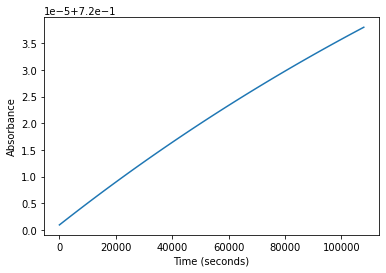

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# https://intl.neb.com/-/media/catalog/datacards-or-manuals/p0757datasheet-lot0101510.pdf?rev=455b97866bda483aa33b6b10dfbe41fa
# 18000 M^-1 cm^-1

absorbance_coeff = 18000 #M^-1 cm^-1
path_length = 0.2 #cm
v_max =3e-8 #set equal to plasmid conc, should work as long as plas

pp1_conc = 2e-4 # units / mm^3
absorbance = lambda conc: absorbance_coeff * conc * path_length
t_end = 108000 # seconds
intervals = 50 # no of intervals in t_range
t_range = list(np.linspace(0,t_end,intervals)) # equidistant points in time from t=0 to t=t_end
dt = t_end/intervals # seconds
#
protein_concentration = 3.160717486686194e-08
#microcystin mol wt = 995.2
#microcystin 1e3 ug/mm^3
#conc_microcystin = 1.004
conc_microcystin = 1.0050251256281406e-09
vcur = 0
microcystin_concs = []
pp1_concs = []

#Ribonuclease 	7.9e-3
K_M = 8e-3

# conc_microcystin prop conc_
for t in t_range:
    vcur = (protein_concentration/(protein_concentration+K_M)) * v_max
    protein_concentration = protein_concentration - vcur * dt
    conc_microcystin = conc_microcystin - vcur * dt 
    pp1_conc = pp1_conc +  vcur * dt
    pp1_concs.append(pp1_conc)
    microcystin_concs.append(conc_microcystin)

y_plot = [absorbance(conc) for conc in pp1_concs]
plt.plot(t_range, y_plot)
plt.ylabel('Absorbance')
plt.xlabel('Time (seconds)')
plt.savefig('absorbanceTime.png')


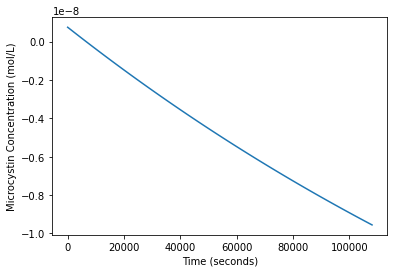

In [5]:
y_plot = [conc for conc in microcystin_concs]
plt.plot(t_range, y_plot)
plt.ylabel('Microcystin Concentration (mol/L)')
plt.xlabel('Time (seconds)')
plt.savefig('conctime.png',dpi=600)

AThe model explained:

So we created an equation with Abhi to characterize the rate of reduction of luminance when Microcystin is introduced

"The rate of reduction in brightness in the yellow channel of the spectrophotometer (luminance) is proportional to the amount of Microcystin" 

B(t) = std_luminance - (k * N_microcystin*t)

The point of the PP1 assay experiment is to find the number of Microcystin present in solution. We can do this given the standard luminance, the rate at which Microcystin inhibits luminance (k), and the luminance at a specific time t. We get all these constants from online but we get the luminance at a specific time (t) 

So we can solve for the amount of Microcystin. Once we get that, we can showcase the luminance over time since we have the equation, just plug in constants and boom

In [6]:
1e-6/995

1.0050251256281406e-09

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=734c903d-f563-4a99-9819-7b5c5123d65b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>